In [1]:
import boto3
import pandas as pd; pd.set_option('display.max_columns', 100)
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

s3 = boto3.resource('s3')
bucket_name = 'data-445-timlincoln'
bucket = s3.Bucket(bucket_name)

file_key = 'CarPrice_Assignment.csv'

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the data-file
car_price = pd.read_csv(file_content_stream)
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
# Defing the input and target variables
X = car_price[['wheelbase', 'enginesize', 'compressionratio', 'horsepower', 'peakrpm', 'citympg']]
Y = car_price['price']
             
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [3]:
# Min-Max scaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [4]:
# Defining the model
md1 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
      tf.keras.layers.Dense(1)
])

md1.compile(optimizer = 'adam', loss = 'mse')
history = md1.fit(X_train, Y_train, epochs = 100, batch_size = 100)

2022-10-07 17:39:56.637651: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-10-07 17:39:56.637725: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-16-60-38.ec2.internal): /proc/driver/nvidia/version does not exist
2022-10-07 17:39:56.639278: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
2/2 [==============================] - 5s 3ms/step - loss: 233507808.0000
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 233507360.0000
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 233506960.0000
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 233506512.0000
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 233506112.0000
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 233505664.0000
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 233505216.0000
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 233504800.0000
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 233504368.0000
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 233503936.0000
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss: 233503488.0000
Epoch 12/100
2/2 [==============================] - 

KeyError: 'val_loss'

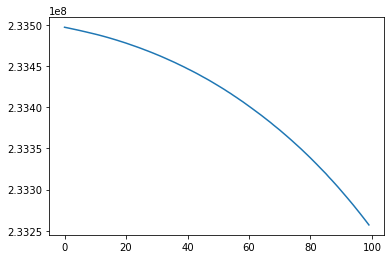

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.grid()
plt.show();

In [5]:
md1.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 264828528.0000


264828528.0

In [6]:
# Defining the model
md2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(10, input_dim = 6, activation = 'relu'),
      tf.keras.layers.Dense(8, activation = 'relu'),
      tf.keras.layers.Dense(1)
])

md2.compile(optimizer = 'adam', loss = 'mse')
history = md2.fit(X_train, Y_train, epochs = 100, batch_size = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 233496896.0000
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 233496128.0000
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 233495328.0000
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 233494528.0000
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 233493728.0000
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 233492912.0000
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 233492032.0000
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 233491184.0000
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 233490288.0000
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 233489408.0000
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 233488512.0000
Epoch 12/100
2/2 [==============================] - 

In [8]:
md2.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 264618064.0000


264618064.0

In [ ]:
# The second model would be preferred over the first because of the lower mse